In [1]:
import pandas as pd

datos = pd.read_csv("../titanic_train.csv")

In [2]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

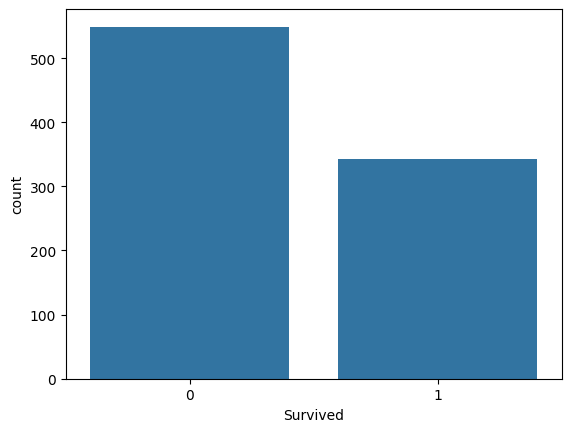

In [4]:
import seaborn as sb

sb.countplot(x=datos["Survived"], data=datos)

<Axes: xlabel='Survived', ylabel='count'>

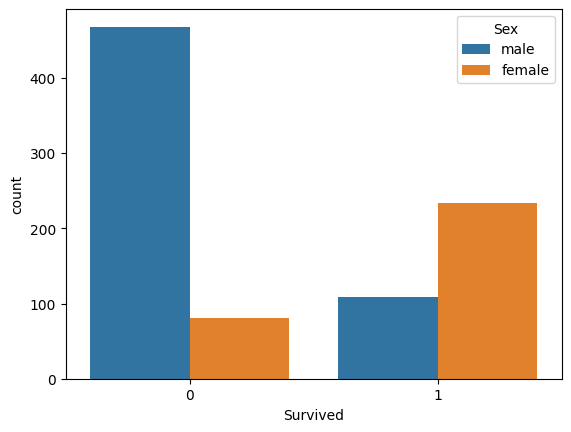

In [5]:
sb.countplot(x=datos["Survived"], data=datos, hue=("Sex"))

In [6]:
datos.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

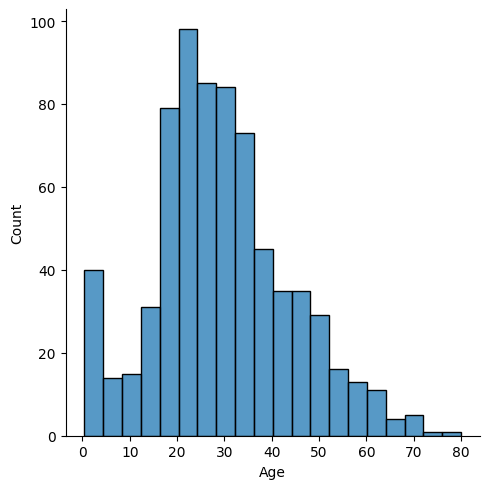

In [7]:
sb.displot(x="Age", data=datos)

In [8]:
datos["Age"] = datos["Age"].fillna(datos["Age"].mean())
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
datos = datos.drop(["Cabin"], axis=1)


In [10]:
datos = datos.dropna()


In [11]:
datos = datos.drop(["PassengerId", "Ticket", "Name"], axis=1)

In [15]:
datos.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [13]:
sex_dummies = pd.get_dummies(datos["Sex"], drop_first=True, dtype=int)
datos = datos.join(sex_dummies)
datos = datos.drop(["Sex"], axis=1)

In [16]:
embarked_dummies = pd.get_dummies(datos["Embarked"], drop_first=True, dtype=int)
datos = datos.join(embarked_dummies)
datos = datos.drop(["Embarked"], axis=1)
datos.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


<Axes: >

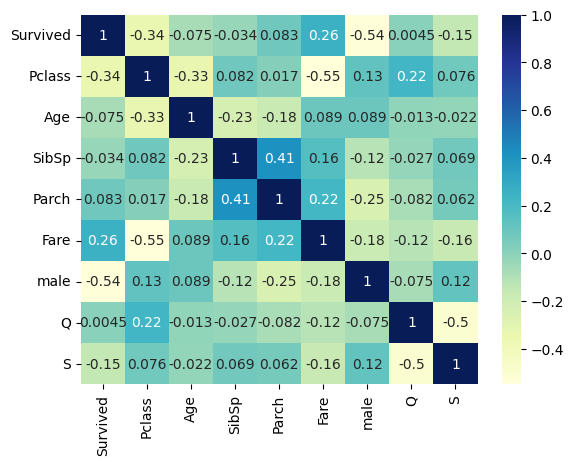

In [17]:
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

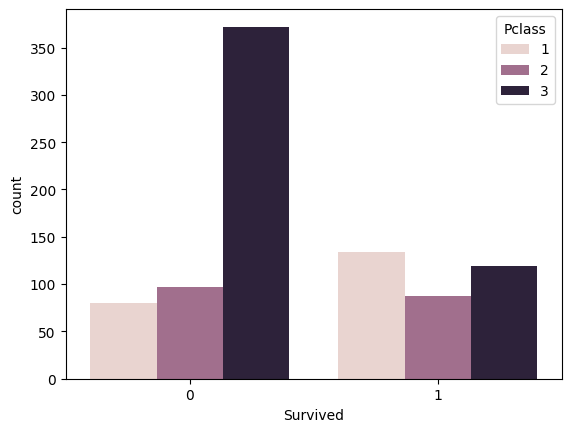

In [18]:
sb.countplot(x="Survived", data=datos, hue="Pclass")

In [19]:
X = datos.drop(["Survived"], axis=1)
Y = datos["Survived"]


In [20]:
from sklearn.model_selection import train_test_split

x_ent, x_pru, y_ent, y_pru = train_test_split(X, Y, test_size=.2)


In [24]:
from sklearn.tree  import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=50)

modelo.fit(x_ent, y_ent)

predicciones = modelo.predict(x_pru)



In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pru, predicciones)

0.7752808988764045

In [30]:
from sklearn.tree  import DecisionTreeClassifier

resultados = []
for i in range(1,15):

    modelo = DecisionTreeClassifier(max_depth=i)

    modelo.fit(x_ent, y_ent)

    predicciones = modelo.predict(x_pru)

    precision = accuracy_score(y_pru, predicciones)

    print(F"Resultado para {i}: {precision}")
    resultados.append(precision)


Resultado para 1: 0.7640449438202247
Resultado para 2: 0.7640449438202247
Resultado para 3: 0.797752808988764
Resultado para 4: 0.797752808988764
Resultado para 5: 0.8033707865168539
Resultado para 6: 0.8033707865168539
Resultado para 7: 0.8089887640449438
Resultado para 8: 0.797752808988764
Resultado para 9: 0.8089887640449438
Resultado para 10: 0.7921348314606742
Resultado para 11: 0.7696629213483146
Resultado para 12: 0.7752808988764045
Resultado para 13: 0.8033707865168539
Resultado para 14: 0.8033707865168539


<Axes: >

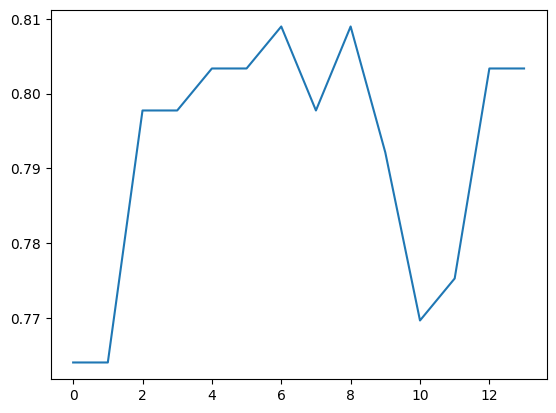

In [31]:
sb.lineplot(data=resultados)

In [32]:
modelo = DecisionTreeClassifier(max_depth=8)

modelo.fit(x_ent, y_ent)

predicciones = modelo.predict(x_pru)

precision = accuracy_score(y_pru, predicciones)


In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.82      0.88      0.84       112
           1       0.76      0.67      0.71        66

    accuracy                           0.80       178
   macro avg       0.79      0.77      0.78       178
weighted avg       0.80      0.80      0.79       178



In [34]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred No", "Pred Si"], index=["Real Si", "Real No"])

,Pred No,Pred Si
Real Si,98,14
Real No,22,44


[Text(0.4562007874015748, 0.9444444444444444, 'male <= 0.5\n0.474\n711\n[437, 274]\nMurió'),
 Text(0.23523622047244094, 0.8333333333333334, 'Pclass <= 2.5\n0.373\n250\n[62, 188]\nVivió'),
 Text(0.09055118110236221, 0.7222222222222222, 'Age <= 2.5\n0.096\n139\n[7, 132]\nVivió'),
 Text(0.047244094488188976, 0.6111111111111112, 'Parch <= 1.5\n0.5\n2\n[1, 1]\nMurió'),
 Text(0.031496062992125984, 0.5, '0.0\n1\n[0, 1]\nVivió'),
 Text(0.06299212598425197, 0.5, '0.0\n1\n[1, 0]\nMurió'),
 Text(0.13385826771653545, 0.6111111111111112, 'Fare <= 28.856\n0.084\n137\n[6, 131]\nVivió'),
 Text(0.09448818897637795, 0.5, 'Fare <= 28.231\n0.163\n56\n[5, 51]\nVivió'),
 Text(0.07874015748031496, 0.3888888888888889, 'Age <= 37.0\n0.135\n55\n[4, 51]\nVivió'),
 Text(0.047244094488188976, 0.2777777777777778, 'Age <= 26.5\n0.093\n41\n[2, 39]\nVivió'),
 Text(0.031496062992125984, 0.16666666666666666, 'Age <= 25.5\n0.208\n17\n[2, 15]\nVivió'),
 Text(0.015748031496062992, 0.05555555555555555, '0.117\n16\n[1, 15]\n

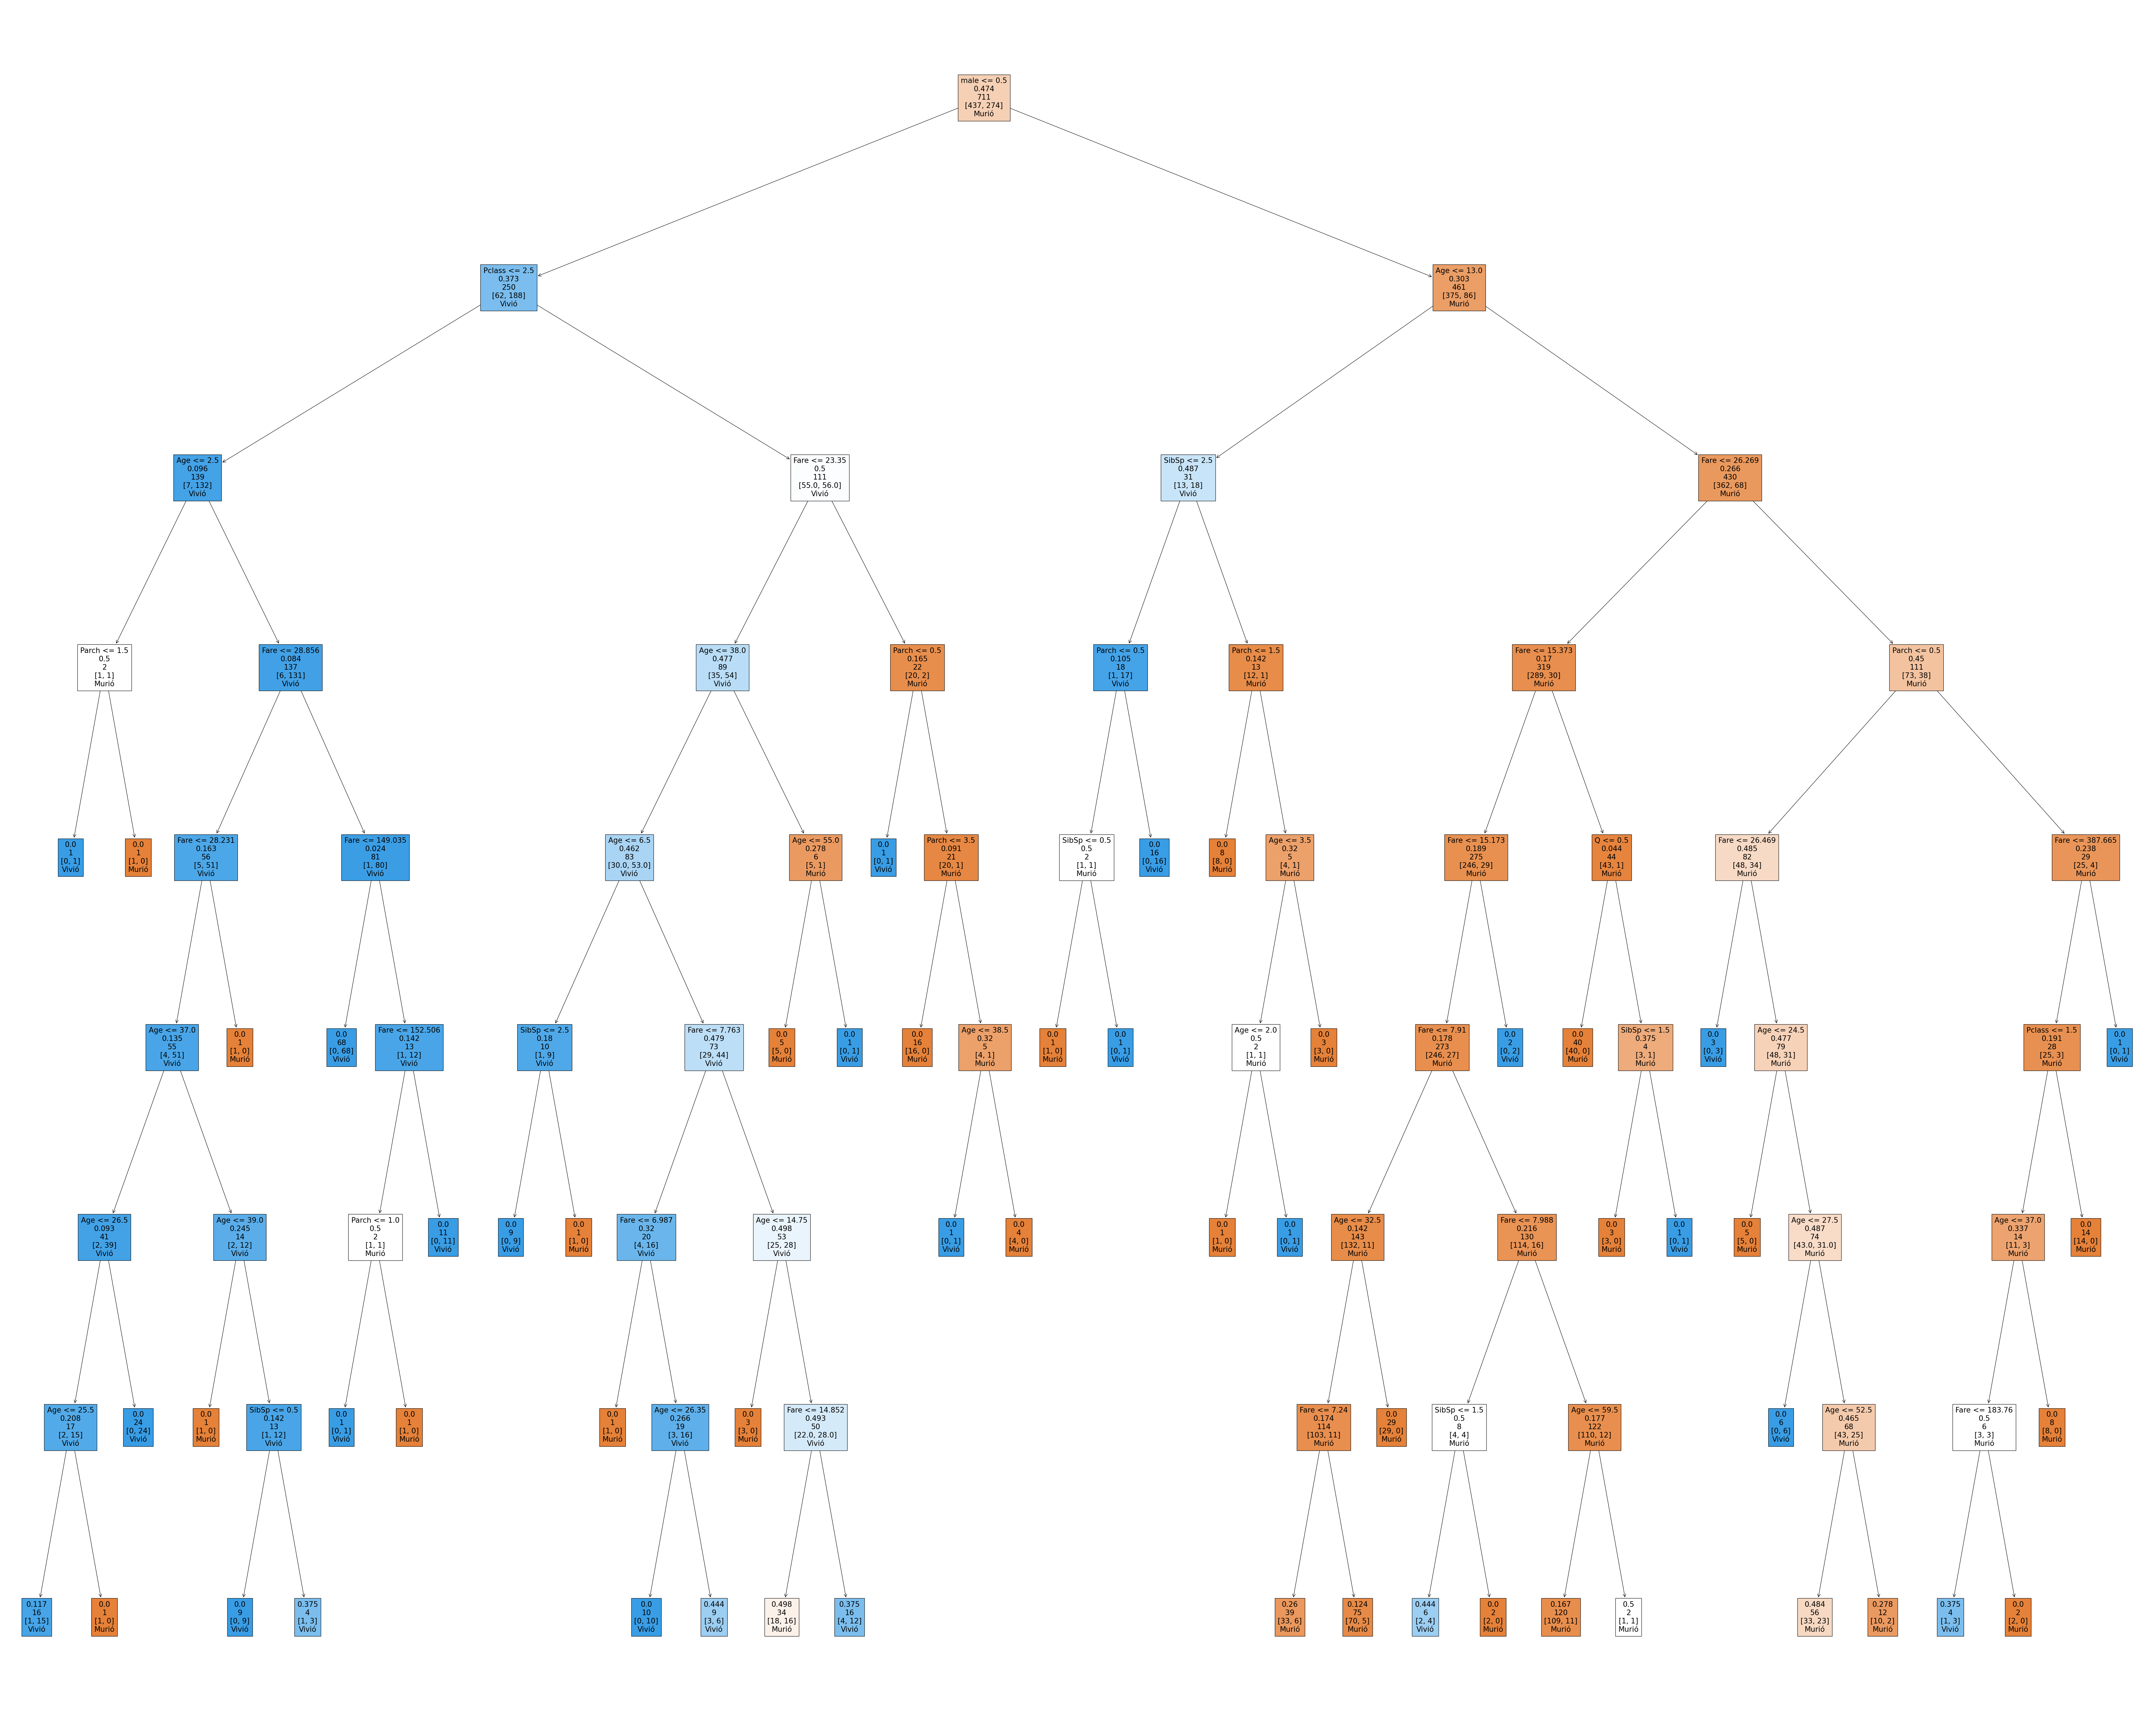

In [36]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100,80))

plot_tree(
    modelo,
    feature_names=x_ent.columns,
    class_names=["Murió", "Vivió"],
    filled=True, label="none"
)